# Part 1:
Let's practice adding logging messages to some existing code. For this exercise, we'll revisit the wine quality code that you refactored in the previous lesson. Below are listed several potential log messages.

Log messages

logging.LEVEL('found val >= median for val:'+val)

logging.LEVEL('computed median:'+median)

logging.LEVEL('updated column headers by replacing ' ' with '_')

logging.LEVEL('done bucketing values')

logging.LEVEL('able to read file:'+winequality-red.csv) 

Think about where these might be placed in the code below.

For each log message provided above, determine the most appropriate level by replacing 'LEVEL' with 'debug' or 'info' (we're excluding 'error' for this exercise) and then place each at the most appropriate location within the code. To start, copy the code block from above with the categorized error messages in place below.

In [11]:
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

# Read the CSV file
df = pd.read_csv('winequality-red.csv', sep=';')
logging.info("Able to read file: winequality-red.csv")

# Update column headers
df.columns = [label.replace(' ', '_') for label in df.columns]
logging.info("Updated column headers by replacing ' ' with '_'")

# Function to bucketize numeric values
def numeric_to_buckets(df, column_name):
    median = df[column_name].median()
    logging.debug(f"Computed median: {median}")
    for i, val in enumerate(df[column_name]):
        if val >= median:
            df.loc[i, column_name] = 'high'
            logging.info(f"Found val >= median for val: {val}")
        else:
            df.loc[i, column_name] = 'low'

# Apply the numeric_to_buckets function to each feature
for feature in df.columns[:-1]:
    numeric_to_buckets(df, feature)
    logging.info(f"Done bucketing values for feature: {feature}")
    print(df.groupby(feature).quality.mean(), '\n')


fixed_acidity
high    5.726061
low     5.540052
Name: quality, dtype: float64 

volatile_acidity
high    5.392157
low     5.890166
Name: quality, dtype: float64 

citric_acid
high    5.822360
low     5.447103
Name: quality, dtype: float64 

residual_sugar
high    5.665880
low     5.602394
Name: quality, dtype: float64 

chlorides
high    5.507194
low     5.776471
Name: quality, dtype: float64 

free_sulfur_dioxide
high    5.595268
low     5.677136
Name: quality, dtype: float64 

total_sulfur_dioxide
high    5.522981
low     5.750630
Name: quality, dtype: float64 

density
high    5.540574
low     5.731830
Name: quality, dtype: float64 

pH
high    5.598039
low     5.675607
Name: quality, dtype: float64 

sulphates
high    5.898917
low     5.351562
Name: quality, dtype: float64 

alcohol
high    5.958904
low     5.310302
Name: quality, dtype: float64 



### Things to think about

This is one potential solution. It's best to put log messages immediately before or after the code that you are logging, and in the case of debugging code that you are using but didn't write yourself, potentially both before and after. Also, the distinction between debug and info can be difficult to determine, and you will get better with practice. Your company likely has some guidelines around logging that you should check out.

In [14]:
import pandas as pd
import logging

df = pd.read_csv('winequality-red.csv', sep=';')
logging.debug("Able to read file: winequality-red.csv")

df.columns = [label.replace(' ', '_') for label in df.columns]
logging.debug("Updated column headers by replacing ' ' with '_'")

def numeric_to_buckets(df, column_name):
    median = df[column_name].median()
    logging.info(f"Computed median: {median}")
    for i, val in enumerate(df[column_name]):
        if val >= median:
            logging.debug(f"Found val >= median for val: {val}")
            df.loc[i, column_name] = 'high'
        else:
            df.loc[i, column_name] = 'low' 
for feature in df.columns[:-1]:
    numeric_to_buckets(df, feature)
    print(df.groupby(feature).quality.mean(), '\n')
logging.info('done bucketing values')

fixed_acidity
high    5.726061
low     5.540052
Name: quality, dtype: float64 

volatile_acidity
high    5.392157
low     5.890166
Name: quality, dtype: float64 

citric_acid
high    5.822360
low     5.447103
Name: quality, dtype: float64 

residual_sugar
high    5.665880
low     5.602394
Name: quality, dtype: float64 

chlorides
high    5.507194
low     5.776471
Name: quality, dtype: float64 

free_sulfur_dioxide
high    5.595268
low     5.677136
Name: quality, dtype: float64 

total_sulfur_dioxide
high    5.522981
low     5.750630
Name: quality, dtype: float64 

density
high    5.540574
low     5.731830
Name: quality, dtype: float64 

pH
high    5.598039
low     5.675607
Name: quality, dtype: float64 

sulphates
high    5.898917
low     5.351562
Name: quality, dtype: float64 

alcohol
high    5.958904
low     5.310302
Name: quality, dtype: float64 



# Part 2: Log messaging
You have written code the goes through your stock portfolio list to determine if the current trading price is high enough to sell. Since all these stocks are less than $10.00 you determine that perfect "sweet spot" price is $3.35. Any time your code determines that a price is less than that "sweet spot" price, it communicates this through a printed message. We want the communication to indicate which stocks to sell.

Your stock portfolio with current trading prices is listed here

In [15]:
{'ABC': 4.43, 'DEF': 7.76, 'GHI': 2.45, 'JKL': 1.76, 'MNO': 3.90, 'PQR': 3.32, 'STU': 7.49, 'VWX': 9.99, 'YZ': 3.35, 'AZH': 0.06}

{'ABC': 4.43,
 'DEF': 7.76,
 'GHI': 2.45,
 'JKL': 1.76,
 'MNO': 3.9,
 'PQR': 3.32,
 'STU': 7.49,
 'VWX': 9.99,
 'YZ': 3.35,
 'AZH': 0.06}

**logging data**

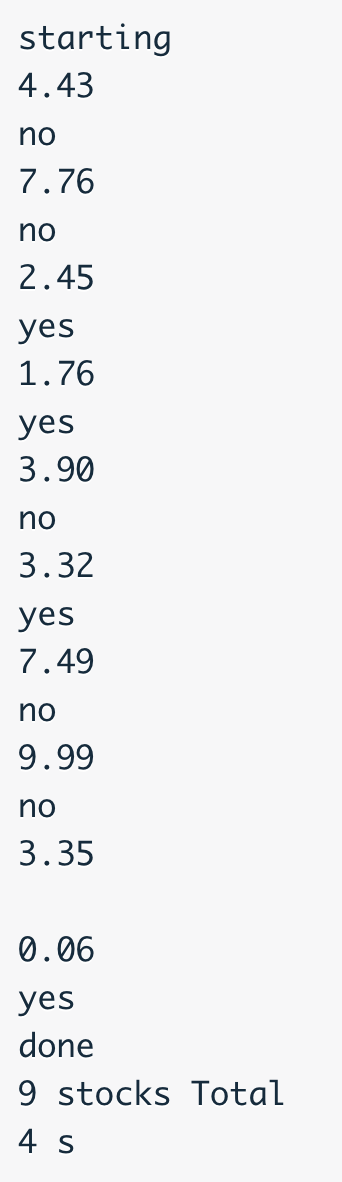

### Things to think about
The code seems to have gone through each of the stocks to check the price, it seems to have correctly identified 3 definite YES, but it is not clear about the stock priced at exactly 3.35. Assuming the 4 s means 4 Sell, this is not in line with the number of "yes" log messages.

- Going through the output stock by stock, it outputs the price of each stock in the list. The price is not as helpful as the stock name
- The output is "yes" and "no", and in one case nothing. This should be "Sell ", or "Do not Sell"
- The 9 stocks Total is not particularly helpful, so possibly remove, but at minimum correct the capitalization
- The 4 s is trying to communicate how many it counted as (s)elling, but this is not clear. Recommend to combine the last 2 lines. "Out of 9 stocks total, 4 are recommended sell."